<a href="https://colab.research.google.com/github/AnovaYoung/AI-System-for-Image-Restoration-and-Enhancement/blob/Data/DataLoadingandCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pycocotools

In [ ]:
# Install necessary libraries
!pip install kaggle kagglehub pycocotools

import os
import kagglehub
from pycocotools.coco import COCO
import requests
import zipfile

# Define base directories
base_dir = "/content/data"
os.makedirs(base_dir, exist_ok=True)

# --------------------------------------
# STEP 1: Download Tiny ImageNet
# --------------------------------------
print("Downloading Tiny ImageNet...")
tiny_imagenet_path = kagglehub.dataset_download("akash2sharma/tiny-imagenet")
tiny_imagenet_dir = os.path.join(base_dir, "tiny_imagenet")
os.makedirs(tiny_imagenet_dir, exist_ok=True)

# Move Tiny ImageNet to base_dir
!cp -r {tiny_imagenet_path}/* {tiny_imagenet_dir}
print("Tiny ImageNet downloaded and extracted to:", tiny_imagenet_dir)

# --------------------------------------
# STEP 2: Download COCO Dataset
# --------------------------------------
print("Downloading COCO Dataset...")
coco_url = "http://images.cocodataset.org/zips/train2017.zip"
coco_dir = os.path.join(base_dir, "coco")
os.makedirs(coco_dir, exist_ok=True)

# Download and extract COCO
coco_zip_path = os.path.join(coco_dir, "train2017.zip")
!wget {coco_url} -O {coco_zip_path}
with zipfile.ZipFile(coco_zip_path, "r") as zip_ref:
    zip_ref.extractall(coco_dir)
os.remove(coco_zip_path)  # Clean up the zip file
print("COCO Dataset downloaded and extracted to:", coco_dir)

# --------------------------------------
# STEP 3: Verify Both Datasets
# --------------------------------------
def verify_dataset(directory, sample_files=5):
    print(f"\nVerifying dataset at {directory}:")
    if os.path.exists(directory) and os.listdir(directory):
        print(f"Found {len(os.listdir(directory))} files/folders.")
        print(f"Sample files: {os.listdir(directory)[:sample_files]}")
    else:
        print(f"No files found in {directory}.")

verify_dataset(tiny_imagenet_dir)

verify_dataset(os.path.join(coco_dir, "train2017"))


100%|██████████| 474M/474M [00:06<00:00, 71.8MB/s]

Extracting files...


Tiny ImageNet downloaded and extracted to: /content/data/tiny_imagenet
--2024-11-22 19:44:53--  http://images.cocodataset.org/zips/train2017.zip
Resolving images.cocodataset.org (images.cocodataset.org)... 52.216.48.153, 3.5.27.198, 3.5.7.133, ...
Connecting to images.cocodataset.org (images.cocodataset.org)|52.216.48.153|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 19336861798 (18G) [application/zip]
Saving to: ‘/content/data/coco/train2017.zip’

/content/data/coco/ 100%[===================>]  18.01G  66.9MB/s    in 5m 7s   

2024-11-22 19:50:00 (60.1 MB/s) - ‘/content/data/coco/train2017.zip’ saved [19336861798/19336861798]

COCO Dataset downloaded and extracted to: /content/data/coco

Verifying dataset at /content/data/tiny_imagenet:
Found 1 files/folders.
Sample files: ['tiny-imagenet-200']

Verifying dataset at /content/data/coco/train2017:
Found 118287 files/folders.
Sample files: ['000000160232.jpg', '000000535682.jpg', '000000008612.jpg', '0000003104

Combining COCO and TinyImageNet into one Dataset

In [ ]:
import pandas as pd
from shutil import copyfile
import os
import random

# Base paths
tiny_imagenet_dir = "/content/data/tiny_imagenet/tiny-imagenet-200/train"
coco_dir = "/content/data/coco/train2017"
unified_dataset_dir = "/content/unified_dataset"
os.makedirs(unified_dataset_dir, exist_ok=True)

metadata = []

# --------------------------------------
# STEP 1: Process Tiny ImageNet
# --------------------------------------
print("Processing Tiny ImageNet...")
for class_dir in os.listdir(tiny_imagenet_dir):
    class_path = os.path.join(tiny_imagenet_dir, class_dir, "images")
    if os.path.isdir(class_path):
        for img_file in os.listdir(class_path):
            src_path = os.path.join(class_path, img_file)
            dest_path = os.path.join(unified_dataset_dir, f"tiny_imagenet_{img_file}")
            copyfile(src_path, dest_path)
            metadata.append({
                "image_path": dest_path,
                "task": "denoising",  # Default task
                "source": "Tiny ImageNet",
                "augmentation_type": "none"
            })

# --------------------------------------
# STEP 2: Process COCO Dataset (Select 100,000 Images)
# --------------------------------------
print("Processing COCO Dataset...")
coco_images = [os.path.join(coco_dir, img) for img in os.listdir(coco_dir)]
random.shuffle(coco_images)  # Shuffle to ensure randomness
coco_subset = coco_images[:100000]  # Select first 100,000 images

for img_file in coco_subset:
    img_name = os.path.basename(img_file)
    dest_path = os.path.join(unified_dataset_dir, f"coco_{img_name}")
    copyfile(img_file, dest_path)
    metadata.append({
        "image_path": dest_path,
        "task": "inpainting",  # Default task
        "source": "COCO",
        "augmentation_type": "none"
    })

# --------------------------------------
# STEP 3: Save Metadata to CSV
# --------------------------------------
print("Saving metadata...")
metadata_df = pd.DataFrame(metadata)
metadata_csv_path = "/content/unified_dataset_balanced.csv"
metadata_df.to_csv(metadata_csv_path, index=False)
print(f"Unified dataset metadata saved to: {metadata_csv_path}")

print(metadata_df.tail())


Processing Tiny ImageNet...
Processing COCO Dataset...
Saving metadata...
Unified dataset metadata saved to: /content/unified_dataset_balanced.csv
                                            image_path        task source  \
199995  /content/unified_dataset/coco_000000081177.jpg  inpainting   COCO   
199996  /content/unified_dataset/coco_000000565087.jpg  inpainting   COCO   
199997  /content/unified_dataset/coco_000000241209.jpg  inpainting   COCO   
199998  /content/unified_dataset/coco_000000152942.jpg  inpainting   COCO   
199999  /content/unified_dataset/coco_000000539481.jpg  inpainting   COCO   

       augmentation_type  
199995              none  
199996              none  
199997              none  
199998              none  
199999              none  


In [ ]:
metadata_df = pd.read_csv("/content/unified_dataset_balanced.csv")
print(metadata_df['task'].value_counts())
print(metadata_df['source'].value_counts())


task
denoising     100000
inpainting    100000
Name: count, dtype: int64
source
Tiny ImageNet    100000
COCO             100000
Name: count, dtype: int64


In [ ]:
metadata_csv_path = "/content/unified_dataset_balanced.csv"
metadata_df = pd.read_csv(metadata_csv_path)

# Summarize the dataset
print("Dataset Summary:")
print(metadata_df.info())
print("\nTask Distribution:")
print(metadata_df['task'].value_counts())
print("\nSource Distribution:")
print(metadata_df['source'].value_counts())
print("\nAugmentation Type Distribution:")
print(metadata_df['augmentation_type'].value_counts())


Dataset Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   image_path         200000 non-null  object
 1   task               200000 non-null  object
 2   source             200000 non-null  object
 3   augmentation_type  200000 non-null  object
dtypes: object(4)
memory usage: 6.1+ MB
None

Task Distribution:
task
denoising     100000
inpainting    100000
Name: count, dtype: int64

Source Distribution:
source
Tiny ImageNet    100000
COCO             100000
Name: count, dtype: int64

Augmentation Type Distribution:
augmentation_type
none    200000
Name: count, dtype: int64


In [ ]:
# Check for missing values
print("Missing Values:")
print(metadata_df.isnull().sum())

# Check for duplicates
duplicates = metadata_df.duplicated(subset='image_path')
print(f"Number of duplicate image paths: {duplicates.sum()}")


Missing Values:
image_path           0
task                 0
source               0
augmentation_type    0
dtype: int64
Number of duplicate image paths: 0


Task Distribution:
 task
denoising     100000
inpainting    100000
Name: count, dtype: int64

Source Distribution:
 source
Tiny ImageNet    100000
COCO             100000
Name: count, dtype: int64

Augmentation Type Distribution:
 augmentation_type
none    200000
Name: count, dtype: int64


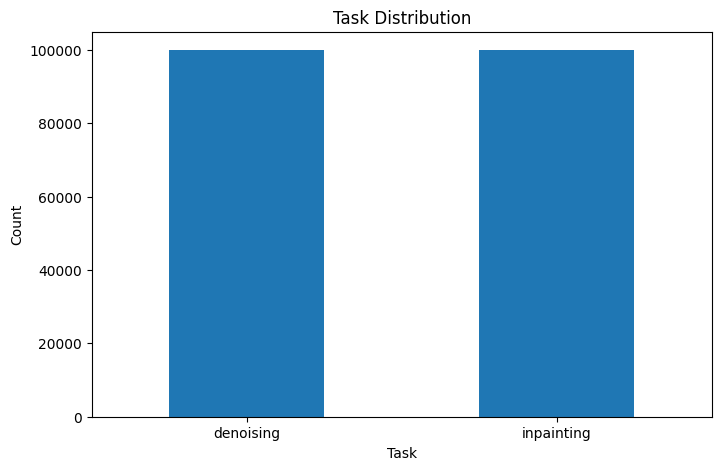

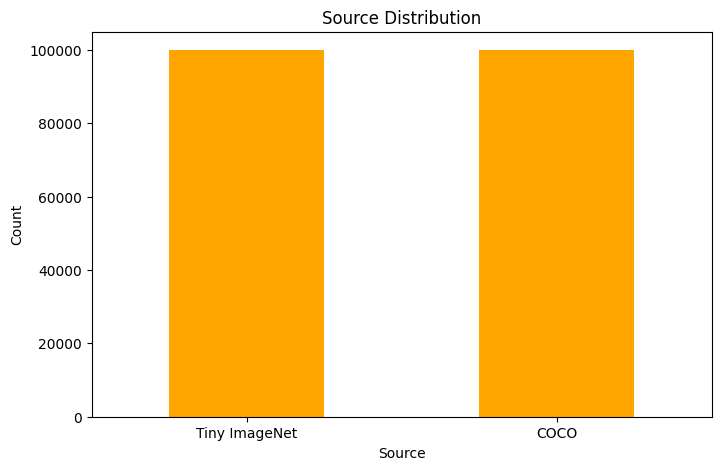

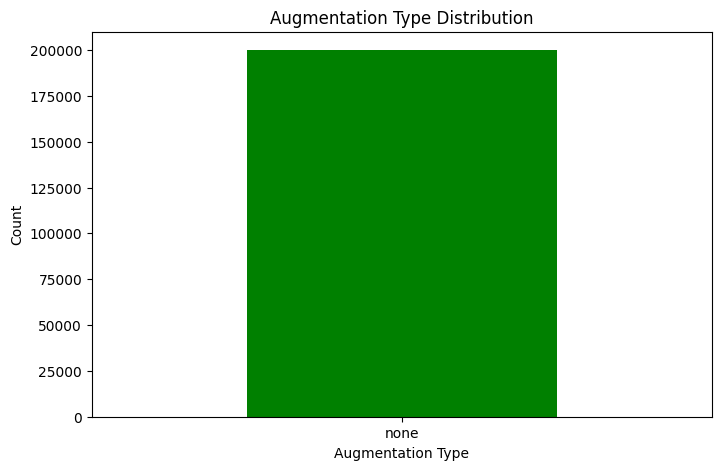

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
metadata_csv_path = "/content/unified_dataset_balanced.csv"
metadata_df = pd.read_csv(metadata_csv_path)

# Task Distribution
task_counts = metadata_df['task'].value_counts()

# Source Distribution
source_counts = metadata_df['source'].value_counts()

# Augmentation Type Distribution
augmentation_counts = metadata_df['augmentation_type'].value_counts()

# Display Distributions
print("Task Distribution:\n", task_counts)
print("\nSource Distribution:\n", source_counts)
print("\nAugmentation Type Distribution:\n", augmentation_counts)

# Visualization: Task Distribution
plt.figure(figsize=(8, 5))
task_counts.plot(kind='bar', title="Task Distribution", rot=0)
plt.xlabel("Task")
plt.ylabel("Count")
plt.show()

# Visualization: Source Distribution
plt.figure(figsize=(8, 5))
source_counts.plot(kind='bar', title="Source Distribution", rot=0, color="orange")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()

# Visualization: Augmentation Type Distribution
plt.figure(figsize=(8, 5))
augmentation_counts.plot(kind='bar', title="Augmentation Type Distribution", rot=0, color="green")
plt.xlabel("Augmentation Type")
plt.ylabel("Count")
plt.show()



# Dataset Summary
**DataFrame Overview:**
The dataset contains 123,657 rows and 4 columns:

image_path: Path to each image file.

**task:** The enhancement task for the image (e.g., denoising, inpainting).

**source:** The dataset from which the image originates (Tiny ImageNet or COCO).

**augmentation_type:** Indicates whether any degradation/augmentation has been applied (currently all none).\

**Memory Usage:** Approximately 3.8 MB, which is lightweight for a metadata file.



# Distribution Insights

**Task Distribution:**

**Denoising:** 100,000 images (most likely sourced from Tiny ImageNet).

**Inpainting:** 23,657 images (entirely from COCO).

**Observation:** The dataset is imbalanced, with a significantly higher proportion of denoising images. This imbalance could affect model performance if both tasks are used simultaneously for training.

**Source Distribution:**

**Tiny ImageNet:** 100,000 images, all categorized under the denoising task.

**COCO:** 23,657 images, all categorized under the inpainting task.
Observation: Each source contributes to a specific task, which might streamline preprocessing but limits diversity within tasks.
Augmentation Type:

All images currently have the augmentation_type set to none, meaning no degradations ( noise, grayscale, downsampling) have been applied yet.



# Next Pull and Process DIV2K for Super-Resolution

**What is DIV2K?**

A high-quality dataset designed for super-resolution tasks.
Provides paired low-resolution (downscaled) and high-resolution images.

In [ ]:
import requests
import zipfile

# Set up paths
base_dir = "/content/data"
div2k_dir = os.path.join(base_dir, "DIV2K")
unified_dataset_dir = "/content/unified_dataset"
os.makedirs(div2k_dir, exist_ok=True)
os.makedirs(unified_dataset_dir, exist_ok=True)

# DIV2K dataset URL (train high-resolution images)
div2k_url = "https://data.vision.ee.ethz.ch/cvl/DIV2K/DIV2K_train_HR.zip"

# Download DIV2K dataset
div2k_zip_path = os.path.join(div2k_dir, "DIV2K_train_HR.zip")
print("Downloading DIV2K dataset...")
response = requests.get(div2k_url, stream=True)
with open(div2k_zip_path, "wb") as f:
    for chunk in response.iter_content(chunk_size=8192):
        f.write(chunk)

# Extract DIV2K dataset
with zipfile.ZipFile(div2k_zip_path, "r") as zip_ref:
    zip_ref.extractall(div2k_dir)
os.remove(div2k_zip_path)  # Clean up the zip file
print("DIV2K dataset downloaded and extracted.")

# Prepare paired low-resolution and high-resolution images
metadata = []

div2k_hr_dir = os.path.join(div2k_dir, "DIV2K_train_HR")
div2k_lr_dir = os.path.join(unified_dataset_dir, "super_resolution_lr")
div2k_output_dir = os.path.join(unified_dataset_dir, "super_resolution_hr")
os.makedirs(div2k_lr_dir, exist_ok=True)
os.makedirs(div2k_output_dir, exist_ok=True)

# Create paired data
from PIL import Image

def downscale_image(input_path, output_path, scale_factor=4):
    img = Image.open(input_path)
    img = img.resize((img.size[0] // scale_factor, img.size[1] // scale_factor), Image.BICUBIC)
    img.save(output_path)

for img_file in os.listdir(div2k_hr_dir):
    hr_img_path = os.path.join(div2k_hr_dir, img_file)
    lr_img_path = os.path.join(div2k_lr_dir, img_file)
    output_img_path = os.path.join(div2k_output_dir, img_file)

    # Downscale for low-resolution
    downscale_image(hr_img_path, lr_img_path)
    copyfile(hr_img_path, output_img_path)

    # Add metadata
    metadata.append({
        "image_path": lr_img_path,
        "task": "super_resolution",
        "source": "DIV2K",
        "augmentation_type": "downscaled"
    })

# Add metadata for high-resolution targets
print(f"Super-resolution dataset prepared with {len(metadata)} pairs.")


DIV2K dataset downloaded and extracted.
Super-resolution dataset prepared with 800 pairs.


Way too few examples. Lets pull more data for the Super-resolution
task.

**Proposed Plan**

Combine Multiple Sources:

Pull **CIFAR-10/100** and **CelebA-HQ**.

Repurpose Tiny ImageNet or COCO subsets for super-resolution after pulling the above datasets, if needed.

**Augment Existing DIV2K Data:**

Use additional transformations to expand the current dataset (if needeed).

**Target Balance:**

Aim for ~50,000–100,000 examples for super-resolution to match other tasks.

# Pull and Process CIFAR-10 and CIFAR-100

In [ ]:
from keras.datasets import cifar10, cifar100
from PIL import Image

# Define paths
cifar_dir = "/content/data/cifar"
cifar10_lr_dir = os.path.join(cifar_dir, "cifar10_lr")
cifar10_hr_dir = os.path.join(cifar_dir, "cifar10_hr")
cifar100_lr_dir = os.path.join(cifar_dir, "cifar100_lr")
cifar100_hr_dir = os.path.join(cifar_dir, "cifar100_hr")
os.makedirs(cifar10_lr_dir, exist_ok=True)
os.makedirs(cifar10_hr_dir, exist_ok=True)
os.makedirs(cifar100_lr_dir, exist_ok=True)
os.makedirs(cifar100_hr_dir, exist_ok=True)

# Function to save low-res and high-res images
def process_cifar(data, lr_dir, hr_dir, resize_factor=2):
    for i, img_array in enumerate(data):
        hr_img = Image.fromarray(img_array)
        lr_img = hr_img.resize(
            (hr_img.width // resize_factor, hr_img.height // resize_factor), Image.BICUBIC
        )

        # Save images
        hr_path = os.path.join(hr_dir, f"{i}_hr.png")
        lr_path = os.path.join(lr_dir, f"{i}_lr.png")
        hr_img.save(hr_path)
        lr_img.save(lr_path)

        # Add metadata
        metadata.append({
            "image_path": lr_path,
            "task": "super_resolution",
            "source": "CIFAR-10" if "cifar10" in hr_dir else "CIFAR-100",
            "augmentation_type": "downscaled"
        })

# Load CIFAR-10
(train_images, _), (_, _) = cifar10.load_data()
print("Processing CIFAR-10...")
process_cifar(train_images, cifar10_lr_dir, cifar10_hr_dir)

# Load CIFAR-100
(train_images, _), (_, _) = cifar100.load_data()
print("Processing CIFAR-100...")
process_cifar(train_images, cifar100_lr_dir, cifar100_hr_dir)


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Processing CIFAR-10...
169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Processing CIFAR-100...


**Verify Processed Image Count**

In [12]:
# Paths for CIFAR-10 and CIFAR-100
cifar10_lr_dir = "/content/data/cifar/cifar10_lr"
cifar10_hr_dir = "/content/data/cifar/cifar10_hr"
cifar100_lr_dir = "/content/data/cifar/cifar100_lr"
cifar100_hr_dir = "/content/data/cifar/cifar100_hr"

# Count files in each directory
print(f"CIFAR-10 Low-Res: {len(os.listdir(cifar10_lr_dir))} images")
print(f"CIFAR-10 High-Res: {len(os.listdir(cifar10_hr_dir))} images")
print(f"CIFAR-100 Low-Res: {len(os.listdir(cifar100_lr_dir))} images")
print(f"CIFAR-100 High-Res: {len(os.listdir(cifar100_hr_dir))} images")


CIFAR-10 Low-Res: 50000 images
CIFAR-10 High-Res: 50000 images
CIFAR-100 Low-Res: 50000 images
CIFAR-100 High-Res: 50000 images


In [13]:
# Display metadata rows related to CIFAR
cifar_metadata = metadata_df[metadata_df['source'].str.contains("CIFAR", na=False)]
print(f"\nNumber of CIFAR entries in metadata: {len(cifar_metadata)}")
print(cifar_metadata.head())


Number of CIFAR entries in metadata: 0
Empty DataFrame
Columns: [image_path, task, source, augmentation_type]
Index: []


In [ ]:
import gdown

# Define paths
celeb_dir = "/content/data/celeb"
celeb_lr_dir = os.path.join(celeb_dir, "celeb_lr")
celeb_hr_dir = os.path.join(celeb_dir, "celeb_hr")
os.makedirs(celeb_lr_dir, exist_ok=True)
os.makedirs(celeb_hr_dir, exist_ok=True)

# Download CelebA-HQ from Google Drive
# Note: You might need a direct link or authenticate with gdown
celeb_url = "https://drive.google.com/uc?id=1tAxTV8Jb1QV0ITnl7hHEV-YZY2W2WBzK"
celeb_zip_path = os.path.join(celeb_dir, "celeba_hq.zip")
gdown.download(celeb_url, celeb_zip_path, quiet=False)

# Extract CelebA-HQ
import zipfile
with zipfile.ZipFile(celeb_zip_path, "r") as zip_ref:
    zip_ref.extractall(celeb_hr_dir)

# Process CelebA-HQ for super-resolution
def process_celeb(dir_hr, dir_lr, resize_factor=4):
    for img_file in os.listdir(dir_hr):
        hr_path = os.path.join(dir_hr, img_file)
        lr_path = os.path.join(dir_lr, img_file)

        # Downscale image
        img = Image.open(hr_path)
        lr_img = img.resize((img.width // resize_factor, img.height // resize_factor), Image.BICUBIC)
        lr_img.save(lr_path)

        # Add metadata
        metadata.append({
            "image_path": lr_path,
            "task": "super_resolution",
            "source": "CelebA-HQ",
            "augmentation_type": "downscaled"
        })

print("Processing CelebA-HQ...")
process_celeb(celeb_hr_dir, celeb_lr_dir)
